<a href="https://colab.research.google.com/github/Nagmashaik123/INFO5502/blob/master/DataMiningNetfixTitles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing libraries numpy, pandas, matplotlib.pyplot and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the netflix_titles.csv which contains the movies and tv shows details
df=pd.read_csv("/content/netflix_titles.csv")

In [3]:
# returning the top 5 records from the csv file
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


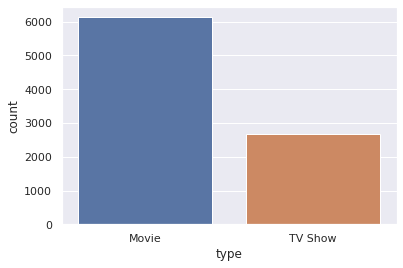

In [4]:
# Data visualization of the column type having movies and tv shows vs returning the count in comparing both
sns.set(style='darkgrid')
MTV_count=sns.countplot( x="type",data=df)

In [5]:
# Creating  df_movies for Movie type
df_movies=df[df['type']=='Movie']

In [6]:
# Creating df_shows for TV show type
df_shows=df[df['type']=='TV Show']

In [7]:
# dropping all missing values for the date added to eliminate data which do not have any date added to released item of the netflix
netfix_date=df_shows[['date_added']].dropna()

In [8]:
netfix_date

,date_added
1,"September 24, 2021"
2,"September 24, 2021"
3,"September 24, 2021"
4,"September 24, 2021"
5,"September 24, 2021"
...,...
8795,"May 1, 2018"
8796,"January 17, 2017"
8797,"September 13, 2018"
8800,"December 15, 2016"


In [9]:
# iterating through date added column to identify what items had been added through the dates and fetch Year , month from the iteration
netfix_date['year']=netfix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netfix_date['month']=netfix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

# Returning the months of the items added
month_array=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
month_array

['December',
 'November',
 'October',
 'September',
 'August',
 'July',
 'June',
 'May',
 'April',
 'March',
 'February',
 'January']

In [10]:

# Applying groupby to the data set over year and month to count the each of the items or releases over the months for different years
date_group= netfix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_array].T

In [11]:
date_group

year,2008,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,
December,0.0,0.0,1.0,7.0,44.0,38.0,61.0,47.0,68.0,0.0
November,0.0,0.0,2.0,2.0,18.0,30.0,36.0,68.0,51.0,0.0
October,0.0,2.0,0.0,4.0,19.0,29.0,45.0,65.0,51.0,0.0
September,0.0,1.0,0.0,1.0,19.0,32.0,43.0,37.0,53.0,65.0
August,0.0,1.0,0.0,0.0,11.0,38.0,34.0,44.0,47.0,61.0
July,0.0,0.0,0.0,2.0,9.0,34.0,27.0,59.0,43.0,88.0
June,0.0,0.0,0.0,2.0,7.0,29.0,28.0,46.0,41.0,83.0
May,0.0,0.0,0.0,1.0,4.0,23.0,27.0,48.0,52.0,38.0
April,0.0,0.0,1.0,4.0,8.0,27.0,28.0,43.0,50.0,53.0


findfont: Font family ['calibri'] not found. Falling back to DejaVu Sans.


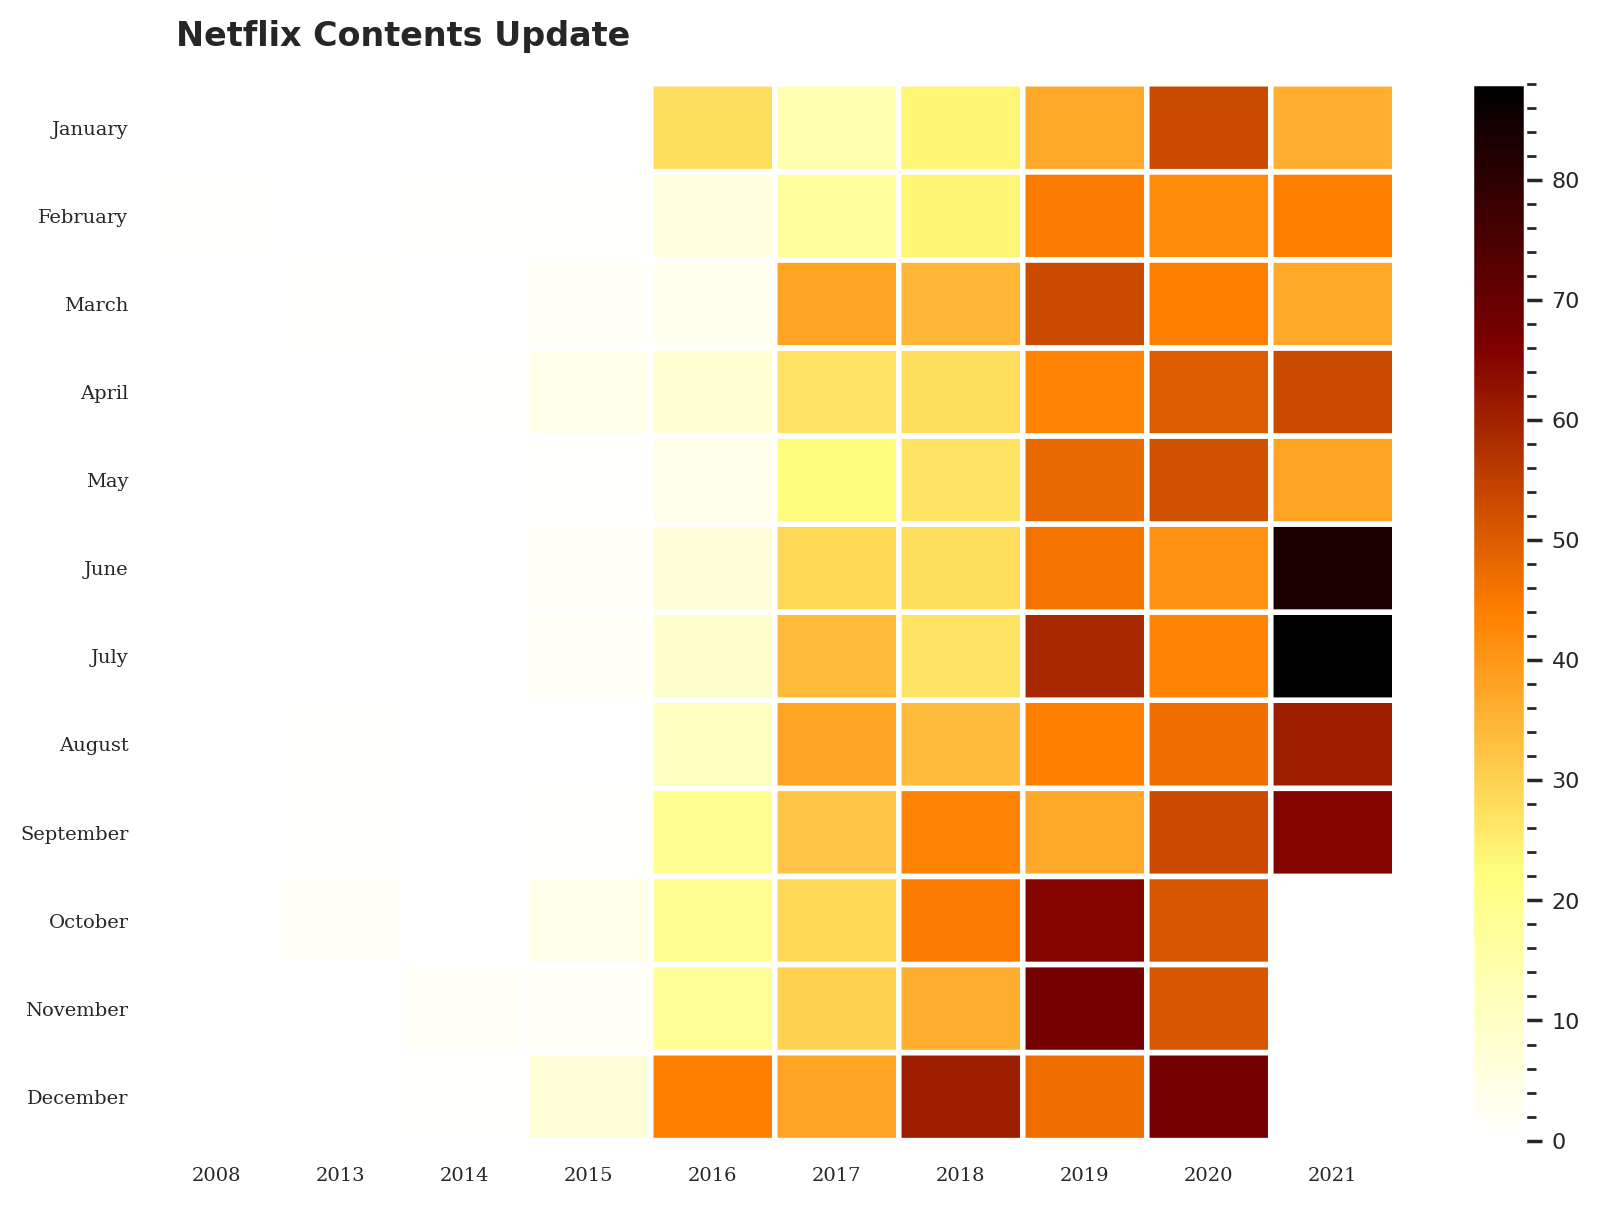

In [12]:

# Visually plotting the releases added  for over january to december from 2008 to 2021
plt.figure(figsize=(10,7), dpi=200)
plt.pcolor(date_group, cmap='afmhot_r', edgecolors='white', linewidths=2)
plt.xticks(np.arange(0.5, len(date_group.columns), 1), date_group.columns, fontsize=7, fontfamily='serif') # reading through columns
plt.yticks(np.arange(0.5, len(date_group.index), 1), date_group.index, fontsize=7, fontfamily='serif') # reading through rows 
plt.title('Netflix Contents Update', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02)) # adding title of the plot
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

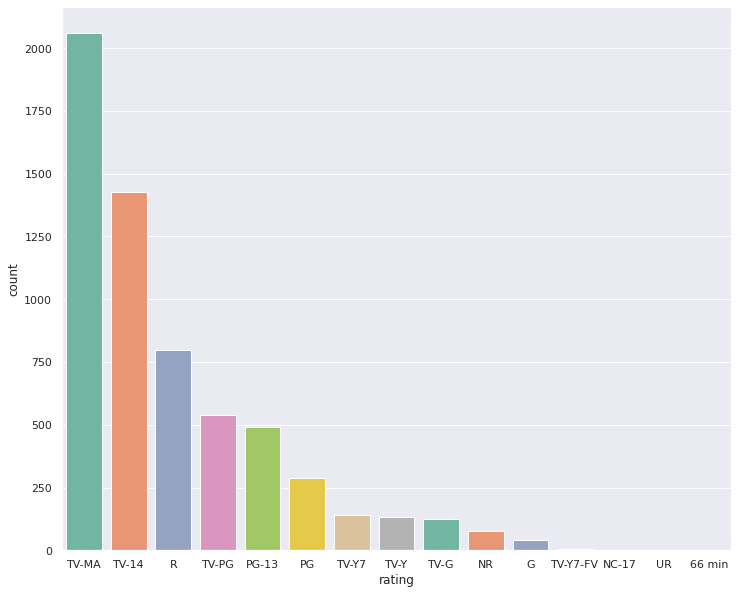

In [13]:
# Plotting the rating count in descending order for the df_movies column which contains different movies.
# This plots a grid between ratingcount of different movies 
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
rating_count=sns.countplot(x="rating",data=df_movies,palette="Set2",order=df_movies['rating'].value_counts().index[0:15])


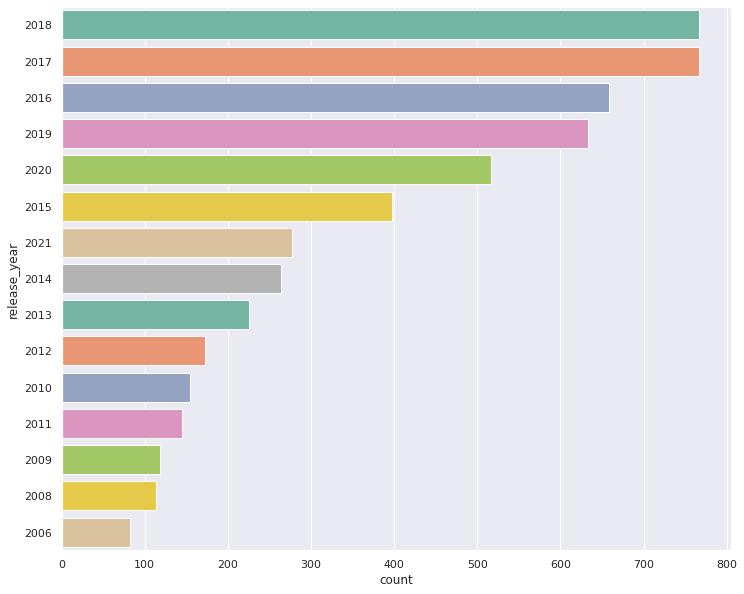

In [14]:
# Plotting the count of movies for each release year from 2006 to 2018 in descending order 
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
year=sns.countplot(y="release_year", data=df_movies,palette="Set2", order=df_movies['release_year'].value_counts().index[0:15])